# TP2 - Winnie VORIHILALA 

# 1- Creation des donnees

In [9]:

from scipy.cluster.hierarchy import dendrogram
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

def load_dat(filename):
    mydata = pd.read_csv(filename, sep=' ', names=['x', 'y'], header=None)
    return mydata


def plot_points_classe_2d(X, Y, titre=' '):
    # setup marker generator and color map
    markers = ('o', '^', 's', 'x', 'v', 'h')
    colors = ('red', 'blue', 'green', 'gray', 'cyan', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    plt.figure()
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(X[Y == cl, 0], X[Y == cl, 1], alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label='classe {}'.format(cl))
    # plt.show()
    plt.title(titre)
    plt.legend(loc='best')


def plot_dendogram(model, label_points=None):
    plt.style.use('ggplot')
    dendro = []
    for a, b in model.children_:
        dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
        # le dernier coefficient devrait contenir le nombre de feuilles
        # dependant de ce noeud  et non le dernier indice
        # de même, le niveau (3eme colonne) ne devrait pas etre
        # le nombre de noeud  mais la distance de Ward
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    dendrogram(dendro, color_threshold=1, labels=label_points,
               show_leaf_counts=True, ax=ax, orientation="right")

def generate_toy_datasets():
    n_points = 20 #nombre de points par classe
    X_toy, y_toy = make_blobs(n_samples=n_points,centers=3)

    #Génération des jeux de données

    # 3 clusters
    n_samples = 1500
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)

    #Anisotropic
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = np.dot(X, transformation)
    X_aniso=np.vstack([X_aniso[y==0], X_aniso[y==1]])
    y_aniso=np.hstack([y[y==0], y[y==1]])
    # Unequal Variance
    X_varied, y_varied = make_blobs(n_samples=n_samples,
                                    cluster_std=[1.0, 2.5, 0.5],
                                    random_state=random_state)
    # Different sizes
    X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
    y_filtered = np.hstack([y[y == 0][:500],  y[y == 1][:100], y[y==2][:10]])

    return X_toy, y_toy, X, y, X_aniso, y_aniso, X_varied, y_varied, X_filtered, y_filtered



In [10]:
X_toy, y_toy, X, y, X_aniso, y_aniso, X_varied, y_varied, X_filtered, y_filtered = generate_toy_datasets()

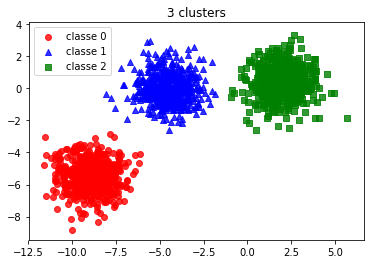

In [11]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plot_points_classe_2d(X, y, titre='3 clusters')

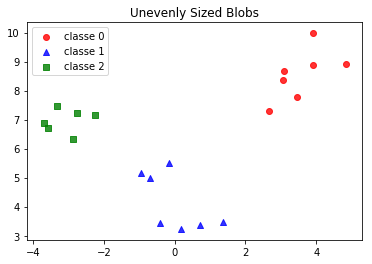

In [12]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plot_points_classe_2d(X_toy, y_toy, titre='Unevenly Sized Blobs')

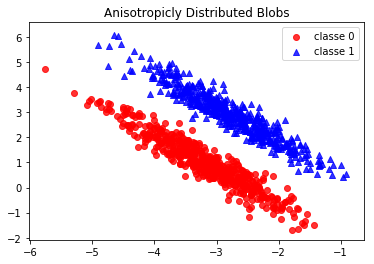

In [13]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plot_points_classe_2d(X_aniso, y_aniso, titre='Anisotropicly Distributed Blobs')

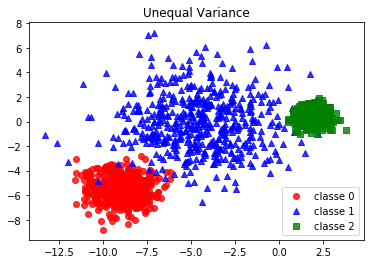

In [14]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plot_points_classe_2d(X_varied, y_varied, titre='Unequal Variance')

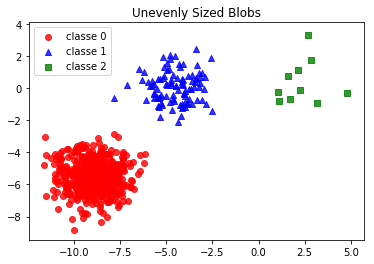

In [15]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plot_points_classe_2d(X_filtered, y_filtered, titre='Unevenly Sized Blobs')

# 2 -Classification hierarchique ascendante (CHA)

## 2.1 Prise en main du clustering

### 2- Test sur les données de la section 1

### Test sur X

In [20]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
G=clustering.fit(X)
G.show=clustering.labels_
print(G.show)

[0 0 1 ... 0 0 0]


In [21]:
clustering = AgglomerativeClustering(4)
G=clustering.fit(X)
G.show=clustering.labels_
print(G.show)

[0 0 1 ... 2 2 2]


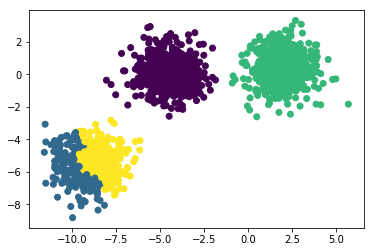

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X [:,0],X[:,1], c=G.show)

### Test sur X_toy

In [17]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
G1=clustering.fit(X_toy)
G1.show=clustering.labels_
print(G1.show)

[0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


In [16]:
clustering = AgglomerativeClustering(3)
G2=clustering.fit(X_toy)
G1.show=clustering.labels_
print(G1.show)

[2 1 1 0 0 0 1 1 2 0 0 1 2 1 2 0 0 2 2 1]


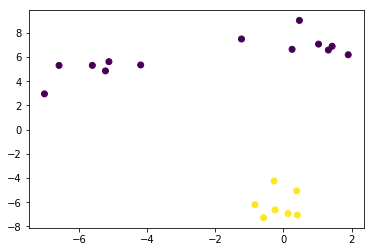

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_toy[:,0],X_toy[:,1], c=G1.show)


### Test sur X_aniso

In [23]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
G3=clustering.fit(X_aniso)
G3.show=clustering.labels_
print(G3.show)

[1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 

In [29]:
clustering = AgglomerativeClustering(3)
G3=clustering.fit(X_aniso)
G3.show=clustering.labels_
print(G3.show)

[1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 2 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 

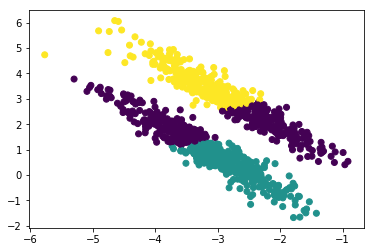

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=G3.show)

### Test sur X_varied

In [26]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
G4=clustering.fit(X_varied)
G4.show=clustering.labels_
print(G4.show)

[0 0 1 ... 0 0 0]


In [28]:
clustering = AgglomerativeClustering(3)
G4=clustering.fit(X_varied)
G4.show=clustering.labels_
print(G4.show)

[0 0 1 ... 2 2 2]


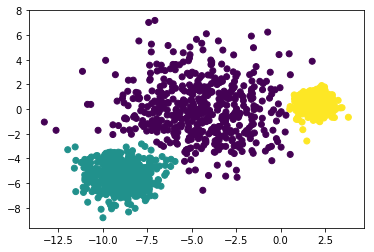

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X_varied[:,0],X_varied[:,1], c=G4.show)

### Test sur X_filtered

In [32]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
G5=clustering.fit(X_filtered)
G5.show=clustering.labels_
print(G5.show)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

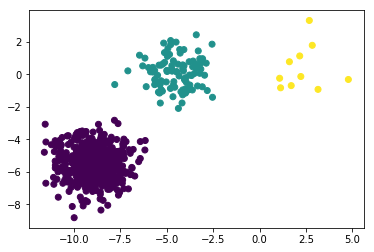

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X_filtered[:,0],X_filtered[:,1], c=G5.show)

In [38]:
clustering = AgglomerativeClustering(3)
G5_3=clustering.fit(X_filtered)
G5_3.show=clustering.labels_
print(G5_3.show)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

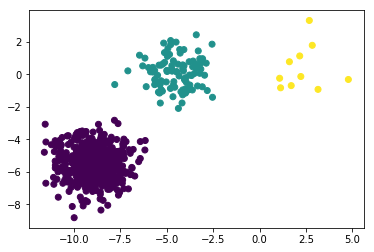

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_filtered[:,0],X_filtered[:,1], c=G5_3.show)

In [44]:
clustering = AgglomerativeClustering(3, affinity = 'manhattan', linkage = 'single')
G5_m=clustering.fit(X_filtered)
G5_m.show=clustering.labels_
print(G5_m.show)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

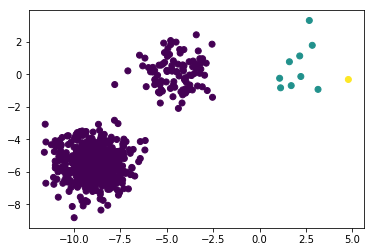

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X_filtered[:,0],X_filtered[:,1], c=G5_m.show)

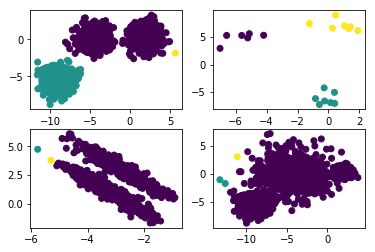

In [47]:
import matplotlib.pyplot as plt

plt.subplot(221)
clustering = AgglomerativeClustering(3, affinity = 'manhattan', linkage = 'single')
G_m=clustering.fit(X)
G_m.show=clustering.labels_
#print(G_m.show)
plt.scatter(X[:,0],X[:,1], c=G_m.show)

plt.subplot(222)
clustering = AgglomerativeClustering(3, affinity = 'manhattan', linkage = 'single')
G1_m=clustering.fit(X_toy)
G1_m.show=clustering.labels_
#print(G1_m.show)
plt.scatter(X_toy[:,0],X_toy[:,1], c=G1_m.show)

plt.subplot(223)
clustering = AgglomerativeClustering(3, affinity = 'manhattan', linkage = 'single')
G2_m=clustering.fit(X_aniso)
G2_m.show=clustering.labels_
#print(G2_m.show)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=G2_m.show)

plt.subplot(224)
clustering = AgglomerativeClustering(3, affinity = 'manhattan', linkage = 'single')
G3_m=clustering.fit(X_varied)
G3_m.show=clustering.labels_
#print(G3_m.show)
plt.scatter(X_varied[:,0],X_varied[:,1], c=G3_m.show)

plt.show()

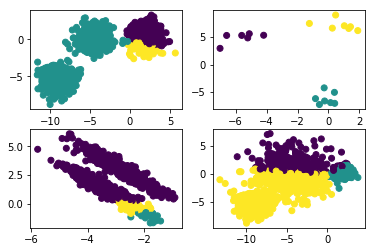

In [48]:
import matplotlib.pyplot as plt

plt.subplot(221)
clustering = AgglomerativeClustering(3, affinity = 'cosine', linkage = 'complete')
G_m=clustering.fit(X)
G_m.show=clustering.labels_
#print(G_m.show)
plt.scatter(X[:,0],X[:,1], c=G_m.show)

plt.subplot(222)
clustering = AgglomerativeClustering(3, affinity = 'cosine', linkage = 'complete')
G1_m=clustering.fit(X_toy)
G1_m.show=clustering.labels_
#print(G1_m.show)
plt.scatter(X_toy[:,0],X_toy[:,1], c=G1_m.show)

plt.subplot(223)
clustering = AgglomerativeClustering(3, affinity = 'cosine', linkage = 'complete')
G2_m=clustering.fit(X_aniso)
G2_m.show=clustering.labels_
#print(G2_m.show)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=G2_m.show)

plt.subplot(224)
clustering = AgglomerativeClustering(3, affinity = 'cosine', linkage = 'complete')
G3_m=clustering.fit(X_varied)
G3_m.show=clustering.labels_
#print(G3_m.show)
plt.scatter(X_varied[:,0],X_varied[:,1], c=G3_m.show)

plt.show()

In [ ]:
Test de affinity = l1 et linkage = average

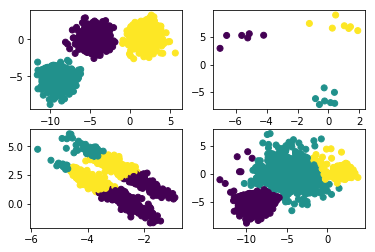

In [49]:
import matplotlib.pyplot as plt

plt.subplot(221)
clustering = AgglomerativeClustering(3, affinity = 'l1', linkage = 'average')
G_m=clustering.fit(X)
G_m.show=clustering.labels_
#print(G_m.show)
plt.scatter(X[:,0],X[:,1], c=G_m.show)

plt.subplot(222)
clustering = AgglomerativeClustering(3, affinity = 'l1', linkage = 'average')
G1_m=clustering.fit(X_toy)
G1_m.show=clustering.labels_
#print(G1_m.show)
plt.scatter(X_toy[:,0],X_toy[:,1], c=G1_m.show)

plt.subplot(223)
clustering = AgglomerativeClustering(3, affinity = 'l1', linkage = 'average')
G2_m=clustering.fit(X_aniso)
G2_m.show=clustering.labels_
#print(G2_m.show)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=G2_m.show)

plt.subplot(224)
clustering = AgglomerativeClustering(3, affinity = 'l1', linkage = 'average')
G3_m=clustering.fit(X_varied)
G3_m.show=clustering.labels_
#print(G3_m.show)
plt.scatter(X_varied[:,0],X_varied[:,1], c=G3_m.show)

plt.show()

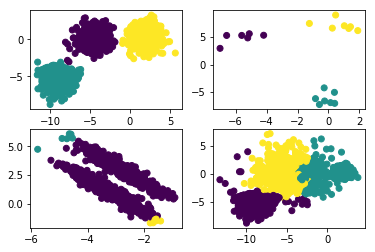

In [50]:
import matplotlib.pyplot as plt

plt.subplot(221)
clustering = AgglomerativeClustering(3, affinity = 'l2', linkage = 'average')
G_m=clustering.fit(X)
G_m.show=clustering.labels_
#print(G_m.show)
plt.scatter(X[:,0],X[:,1], c=G_m.show)

plt.subplot(222)
clustering = AgglomerativeClustering(3, affinity = 'l2', linkage = 'average')
G1_m=clustering.fit(X_toy)
G1_m.show=clustering.labels_
#print(G1_m.show)
plt.scatter(X_toy[:,0],X_toy[:,1], c=G1_m.show)

plt.subplot(223)
clustering = AgglomerativeClustering(3, affinity = 'l2', linkage = 'average')
G2_m=clustering.fit(X_aniso)
G2_m.show=clustering.labels_
#print(G2_m.show)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=G2_m.show)

plt.subplot(224)
clustering = AgglomerativeClustering(3, affinity = 'l2', linkage = 'average')
G3_m=clustering.fit(X_varied)
G3_m.show=clustering.labels_
#print(G3_m.show)
plt.scatter(X_varied[:,0],X_varied[:,1], c=G3_m.show)

plt.show()

## 2.2 Etude du dendrogramme

### 1- Générez un jeu de données composé de deux gaussiennes bien distinctes.

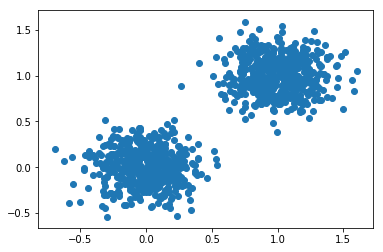

In [53]:
mu1 = [0,0]
mu2 = [1,1]
sigma = .2

X1 = np.random.normal(mu1, sigma, (500,2))
X2 = np.random.normal(mu2, sigma, (500,2))

#la fonction numpy.random.normal permet de tirer des échantillons à partir d'une distribution normale 
#ou gaussienne

X_G = np.concatenate((X1,X2))
plt.scatter(X_G[:,0], X_G[:,1])

### 2- Test du clustering avec différentes valeurs pour le nombre de clusters

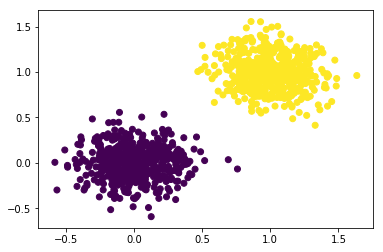

In [56]:
clustering = AgglomerativeClustering(2)
G_test1=clustering.fit(X_G)
G_test1.show=clustering.labels_
plt.scatter(X[:,0],X[:,1], c=G_test1.show)

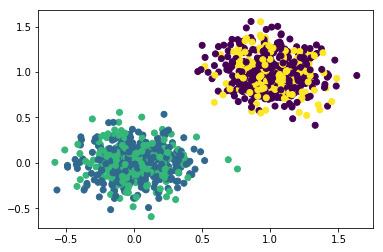

In [58]:
clustering = AgglomerativeClustering(4)
G_test2=clustering.fit(X_G)
G_test2.show=clustering.labels_
plt.scatter(X[:,0],X[:,1], c=G_test2.show)

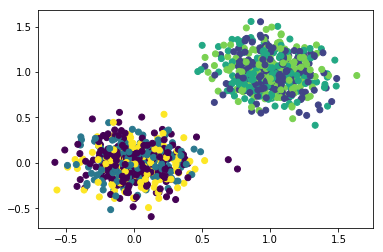

In [59]:
clustering = AgglomerativeClustering(6)
G_test3=clustering.fit(X_G)
G_test3.show=clustering.labels_
plt.scatter(X[:,0],X[:,1], c=G_test3.show)

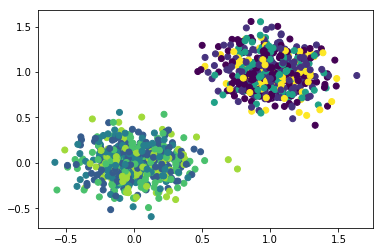

In [60]:
clustering = AgglomerativeClustering(8)
G_test3=clustering.fit(X_G)
G_test3.show=clustering.labels_
plt.scatter(X[:,0],X[:,1], c=G_test3.show)

### 3- Plot du dendrogramme

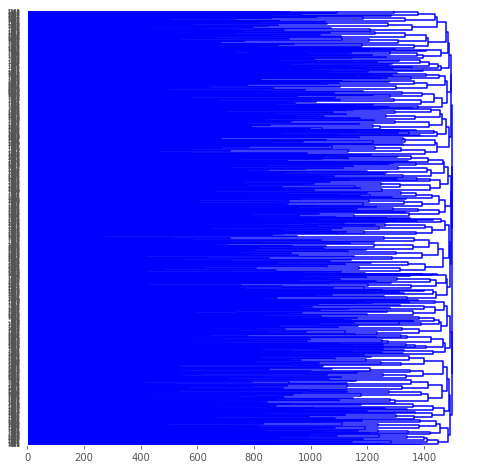

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G, label_points=None)

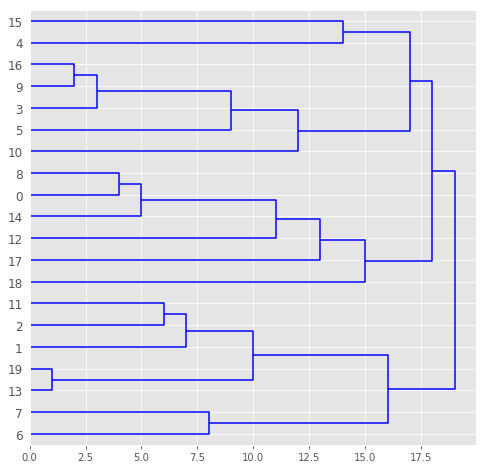

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G1, label_points=None)

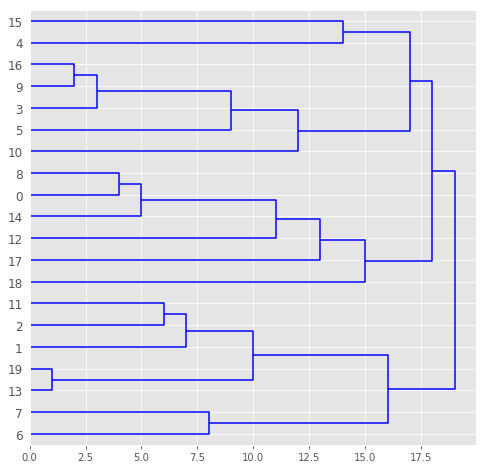

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G2, label_points=None)

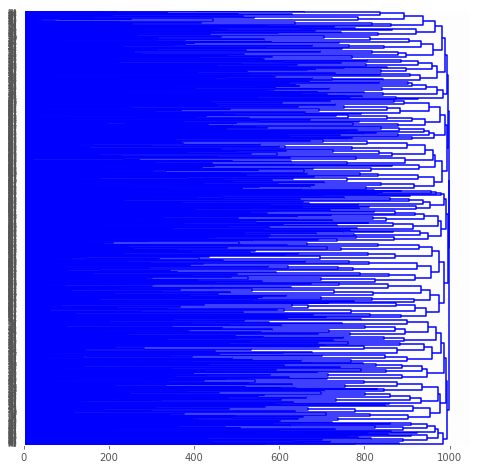

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G3, label_points=None)

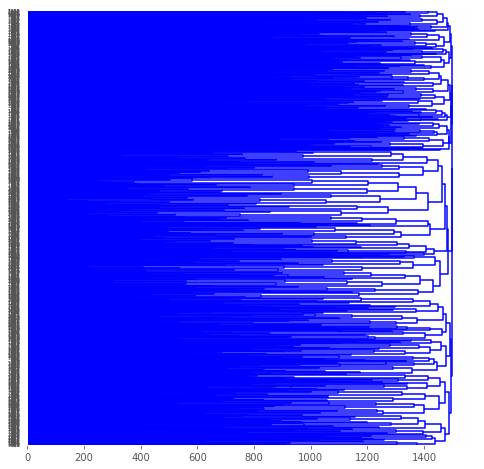

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G4, label_points=None)

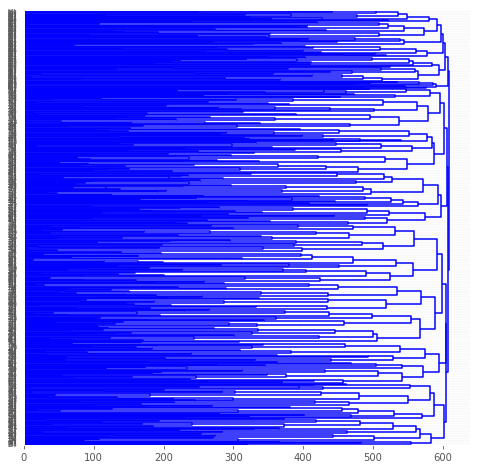

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plot_dendogram(G5, label_points=None)

# 3 - Méthode des k-means

## 2- Test sur les jeux de données créés dans la section 1

### Test sur X_toy

In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_toy)
K_2=kmeans.labels_
print(K_2)

[0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_toy)
K_4=kmeans.labels_
print(K_4)

[0 1 1 2 3 2 1 1 0 2 2 1 0 1 0 3 2 0 0 1]


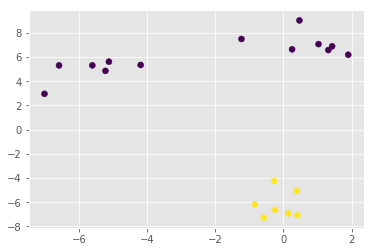

In [84]:
import matplotlib.pyplot as plt
plt.scatter(X_toy[:,0],X_toy[:,1], c=K_2)

### Test sur X_aniso

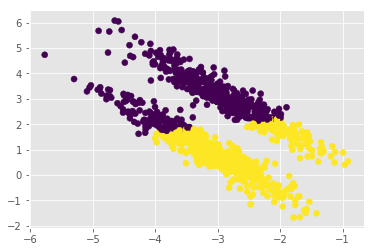

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_aniso)
K_2=kmeans.labels_
#print(K_2)

plt.scatter(X_aniso[:,0],X_aniso[:,1], c=K_2)

### Test sur X_varied

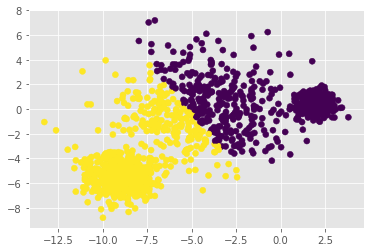

In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_varied)
K_2=kmeans.labels_

plt.scatter(X_varied[:,0],X_varied[:,1], c=K_2)

### Test sur X

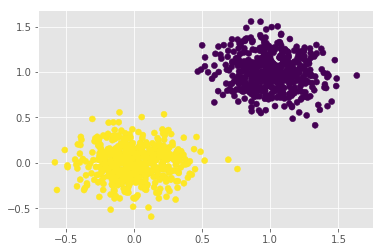

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
K_2=kmeans.labels_

plt.scatter(X[:,0],X[:,1], c=K_2)

### Test sur X_filtered

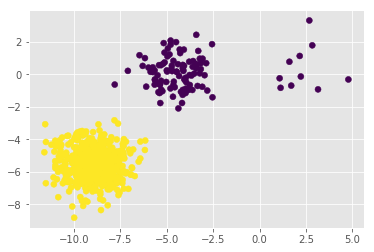

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_filtered)
K_2=kmeans.labels_

plt.scatter(X_filtered[:,0],X_filtered[:,1], c=K_2)

In [ ]:
Les limites de l'algorithme de k-Means sont :
- k doit être forcément connu à l'avance, ce qui n'est pas le cas pour l'algorithme du CHA
- Kmeans est défini uniquement pour une distance euclidienne, ne focntionnne pas pour les autres types de distance type l1, 12, cosine, à la différence de l'algorithme de CHA 

## 3-1 Test du mini batch K-means

### 2- Générez un dataset de 5000 points

(2500, 2)


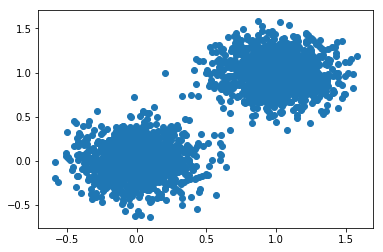

In [3]:
#generer un jeu de donnees avec 5000 points
import matplotlib.pyplot as plt
import numpy as np

mu1 = [0,0]
mu2 = [1,1]
sigma = .2

M1 = np.random.normal(mu1, sigma, (1250,2))
M2 = np.random.normal(mu2, sigma, (1250,2)) 

#la fonction numpy.random.normal permet de tirer des échantillons à partir d'une distribution normale 
#ou gaussienne

M = np.concatenate((M1,M2))
print(M.shape)
plt.scatter(M[:,0], M[:,1])

### 3- Comparaison du temps de résultat de Kmeans et MiniBatchKMeans

#### Test de K-means

[0 0 0 ... 1 2 1]
(10000,)


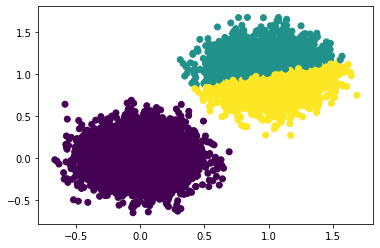

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(M)
K_3=kmeans.labels_

print(K_3)
print(K_3.shape)

plt.scatter(M[:,0],M[:,1], c=K_3)

#### Test de MiniBatchKMeans

In [30]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3,random_state=0,batch_size=6,max_iter=10).fit(M)
                         
MB_1=kmeans.cluster_centers_

print(MB_1)
print(MB_1.shape)

[[1.02313594e+00 1.11247469e+00]
 [9.12758255e-04 1.56291641e-02]
 [9.78571185e-01 7.93390680e-01]]
(3, 2)


#### Test de MiniBatchKMeans sur les donnees de la section 1

In [31]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

kmeans = MiniBatchKMeans(n_clusters=2,random_state=0, batch_size=6, max_iter=10).fit(X_toy)
K_2=kmeans.cluster_centers_
print(K_2)
print(K_2.shape)

[[-1.29923136  5.4127203 ]
 [ 3.57862141  8.63015001]]
(2, 2)


In [33]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=4,random_state=0, batch_size=6, max_iter=10).fit(X_toy)
K_4=kmeans.cluster_centers_
print(K_4)
print(K_4.shape)

[[ 0.64367668  3.38660198]
 [-3.01440154  6.96854739]
 [ 3.59291214  8.6200941 ]
 [-0.65349248  5.17865032]]
(4, 2)


### 4 Généralisation sur des données réelles

(1797, 64)
(1797,)


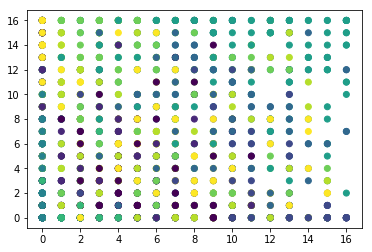

In [67]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
#print(digits)
Xd=digits.data
Yd=digits.target
print(Xd.shape)
print(Yd.shape)
plt.scatter(Xd[:,2],Xd[:,5], c=Yd)

### Test du CHA

In [52]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering()
Gd=clustering.fit(Xd)
Gd.show=clustering.labels_
print(Gd.show)

[1 0 0 ... 0 0 0]


In [61]:
clustering = AgglomerativeClustering(3)
Gd=clustering.fit(Xd)
Gd.show=clustering.labels_
print(Gd.show)

[0 2 2 ... 2 1 2]


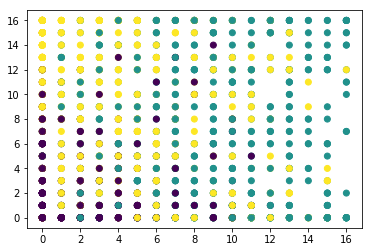

In [68]:
import matplotlib.pyplot as plt
plt.scatter(Xd[:,2],Xd[:,5], c=Gd.show)

### Test du Kmeans

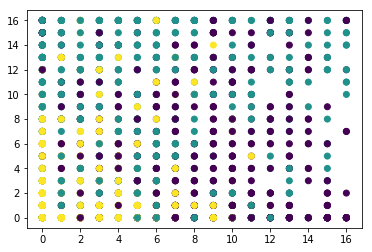

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(Xd)
Kd_3=kmeans.labels_
#print(K_3)

plt.scatter(Xd[:,2],Xd[:,5], c=Kd_3)